In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import keras
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,AveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import LearningRateScheduler,ReduceLROnPlateau
from keras.optimizers import Adam # I believe this is better optimizer for our case
from keras.preprocessing.image import ImageDataGenerator # to augmenting our images for increasing accuracy
from keras.utils.vis_utils import plot_model
import scipy
from sklearn.model_selection import train_test_split # to split our train data into train and validation sets
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
np.random.seed(13) # My lucky number

In [ ]:
num_classes = 7 # We have 10 digits to identify
batch_size = 128 # Handle 128 pictures at each round
epochs = 50 # 50 Epoch is enough
img_rows, img_cols = 28, 28 # Image dimensions 28 pixels in height&width
input_shape = (28, 28, 3)

In [ ]:
# get all the directories of the data
train= '/content/drive/MyDrive/Colab Notebooks/primary_small/train'
val= '/content/drive/MyDrive/Colab Notebooks/primary_small/valid'
test= '/content/drive/MyDrive/Colab Notebooks/primary_small/test'
classes = ["brightpixel", "narrowband","narrowbanddrd","noise","squarepulsednarrowband","squiggle","squigglesquarepulsednarrowband"]

../content/primary_small/train
../content/primary_small/test
../content/primary_small/valid


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=10, vertical_flip=True,
                                  horizontal_flip=True, fill_mode='reflect', zoom_range = 0.1, width_shift_range=0.1, height_shift_range=0.1)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
train_batch_size = 128
img_dim = (28, 28)
classes = ['brightpixel', 'narrowband','narrowbanddrd', 'noise',  'squarepulsednarrowband', 'squiggle','squigglesquarepulsednarrowband']

In [ ]:
train_generator = train_datagen.flow_from_directory(directory='/content/primary_small/train', classes=classes, target_size=img_dim, 
                                                    batch_size=batch_size, class_mode='categorical', interpolation='bicubic',
                                                   shuffle=True, seed=13)

val_generator = valid_datagen.flow_from_directory(directory='/content/primary_small/valid', classes = classes, target_size=img_dim, batch_size=64,
                                                 class_mode='categorical', shuffle=False, seed=13, interpolation='bicubic')

Found 5600 images belonging to 7 classes.
Found 700 images belonging to 7 classes.


Deep Ensemble CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(7,activation='softmax'))
#The Final layer with seven outputs for seven categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
def LeNet5(input_shape=input_shape,num_classes=num_classes):
    model = Sequential()
    model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=input_shape, padding="same"))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
    model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    model.add(Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))
    model.add(Flatten())
    model.add(Dense(84, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer =  Adam() , loss = "categorical_crossentropy", metrics=["accuracy"])
    return model


My Custom CNN Network:


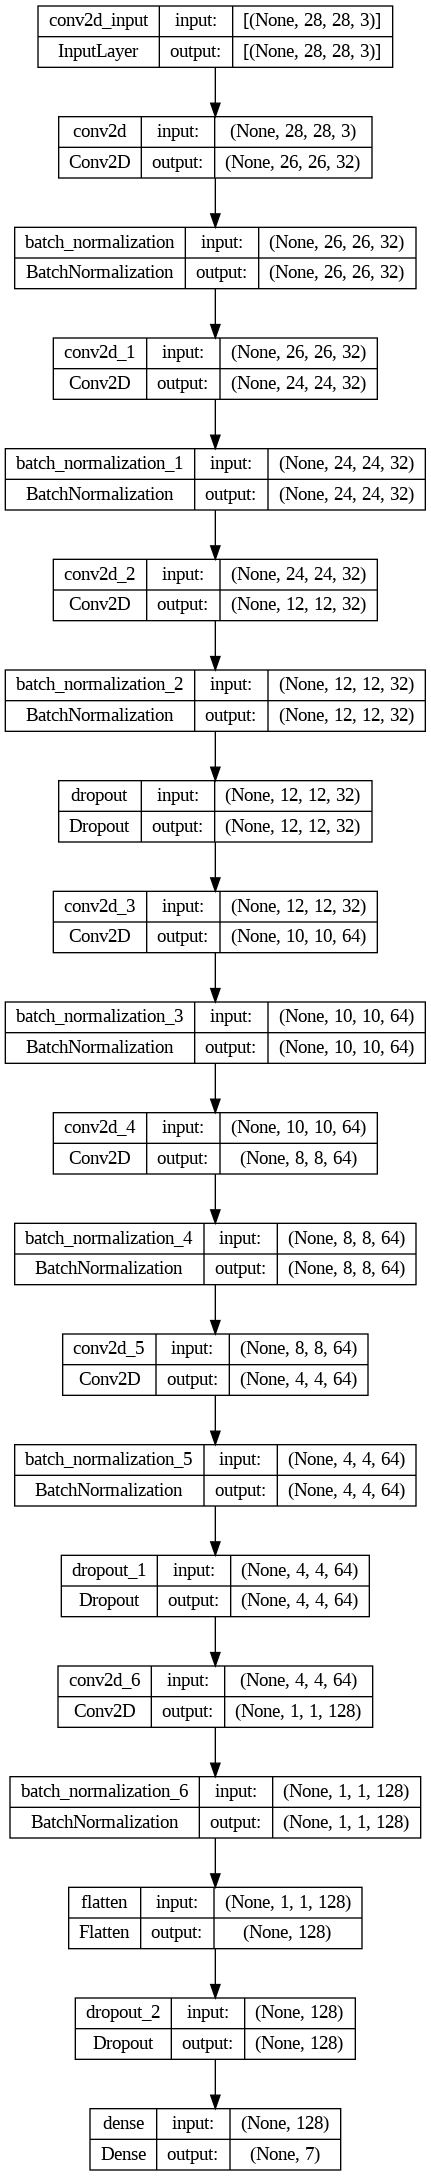

In [ ]:
print("My Custom CNN Network:")
plot_model(model(),to_file='custom-cnn.png', show_shapes=True, show_layer_names=True)

Master Yann LeCun's LeNet-5 Network:


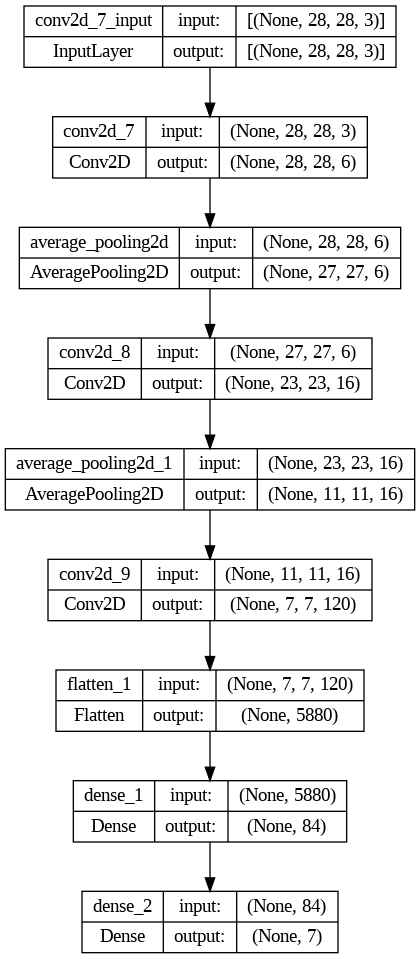

In [ ]:
print("Master Yann LeCun's LeNet-5 Network:")
plot_model(LeNet5(), to_file='lenet-5.png', show_shapes=True, show_layer_names=True)

In [ ]:
model = []
model.append(model())
model.append(LeNet5())


In [ ]:
import tensorflow as tf
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
models = []
for i in range(len(model)):
    model[i].fit_generator(train_generator, epochs = epochs,
                              validation_data=val_generator, callbacks=[model_checkpoint_callback], verbose=2)
    models.append(model[i])

<ipython-input-20-f78911e5de39>:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model[i].fit_generator(train_generator, epochs = epochs,


Epoch 1/50
44/44 - 56s - loss: 2.2205 - accuracy: 0.2568 - val_loss: 2.0017 - val_accuracy: 0.1429 - 56s/epoch - 1s/step
Epoch 2/50
44/44 - 53s - loss: 1.8592 - accuracy: 0.2805 - val_loss: 2.1126 - val_accuracy: 0.1429 - 53s/epoch - 1s/step
Epoch 3/50
44/44 - 53s - loss: 1.8029 - accuracy: 0.2879 - val_loss: 2.2173 - val_accuracy: 0.1429 - 53s/epoch - 1s/step
Epoch 4/50
44/44 - 52s - loss: 1.7811 - accuracy: 0.2841 - val_loss: 2.1635 - val_accuracy: 0.1386 - 52s/epoch - 1s/step
Epoch 5/50
44/44 - 53s - loss: 1.7333 - accuracy: 0.3004 - val_loss: 2.2425 - val_accuracy: 0.1429 - 53s/epoch - 1s/step
Epoch 6/50
44/44 - 53s - loss: 1.7057 - accuracy: 0.3150 - val_loss: 2.1809 - val_accuracy: 0.1586 - 53s/epoch - 1s/step
Epoch 7/50
44/44 - 52s - loss: 1.5746 - accuracy: 0.3764 - val_loss: 3.7669 - val_accuracy: 0.1400 - 52s/epoch - 1s/step
Epoch 8/50
44/44 - 53s - loss: 1.5254 - accuracy: 0.4093 - val_loss: 5.0563 - val_accuracy: 0.1143 - 53s/epoch - 1s/step
Epoch 9/50
44/44 - 52s - loss: 1

In [ ]:
# Predict labels with models
labels = []
for m in models:
    predicts = np.argmax(m.predict(test), axis=1)
    labels.append(predicts)
    
# Ensemble with voting
labels = np.array(labels)
labels = np.transpose(labels, (1, 0))
labels = scipy.stats.mode(labels, axis=-1)[0]
labels = np.squeeze(labels)